In [68]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [69]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sample_submission.csv")
structure = pd.read_csv("../input/structures.csv")

In [70]:
print(train.shape)
train.head(3)

(4659076, 6)


,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548


In [71]:
print(len(train["type"].unique()))
train["type"].unique()

8


array(['1JHC', '2JHH', '1JHN', '2JHN', '2JHC', '3JHH', '3JHC', '3JHN'],
      dtype=object)

In [72]:
train.describe()

,id,atom_index_0,atom_index_1,scalar_coupling_constant
count,4.659076e+06,4.659076e+06,4.659076e+06,4.659076e+06
mean,2.329538e+06,1.335677e+01,5.881245e+00,1.591591e+01
std,1.344960e+06,3.269432e+00,4.993794e+00,3.493466e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,-4.476050e+01
25%,1.164769e+06,1.100000e+01,2.000000e+00,-2.551463e-01
50%,2.329538e+06,1.300000e+01,5.000000e+00,2.280350e+00
75%,3.494306e+06,1.600000e+01,8.000000e+00,7.389100e+00
max,4.659075e+06,2.800000e+01,2.800000e+01,2.077090e+02


In [73]:
test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type
0,4659076,dsgdb9nsd_000004,2,0,2JHC
1,4659077,dsgdb9nsd_000004,2,1,1JHC
2,4659078,dsgdb9nsd_000004,2,3,3JHH


In [74]:
print(structure.shape)
structure.head(3)

(2358875, 6)


,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277


In [75]:
print(len(structure["atom"].unique()))
structure["atom"].unique()

5


array(['C', 'H', 'N', 'O', 'F'], dtype=object)

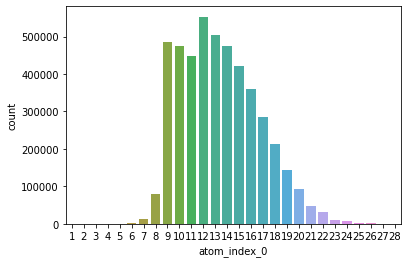

In [76]:
import seaborn as sns

sns.countplot(train["atom_index_0"]);

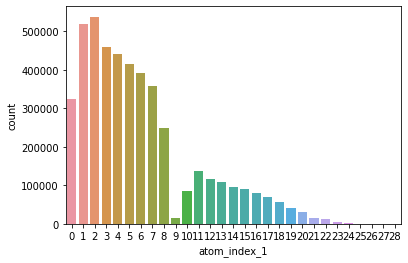

In [77]:
sns.countplot(train["atom_index_1"]);

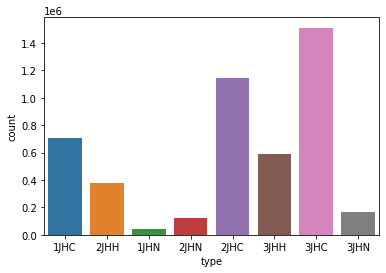

In [78]:
sns.countplot(train["type"]);

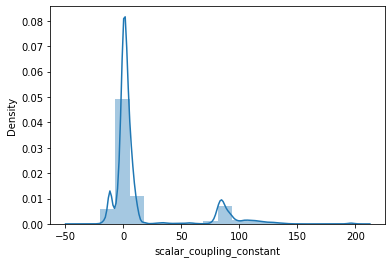

In [79]:
sns.distplot(train["scalar_coupling_constant"], bins=20);

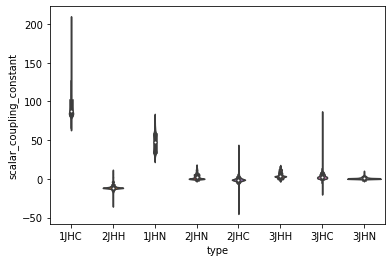

In [80]:
sns.violinplot(x="type", y="scalar_coupling_constant", data=train);

In [81]:
train.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,4,dsgdb9nsd_000001,2,0,1JHC,84.8074


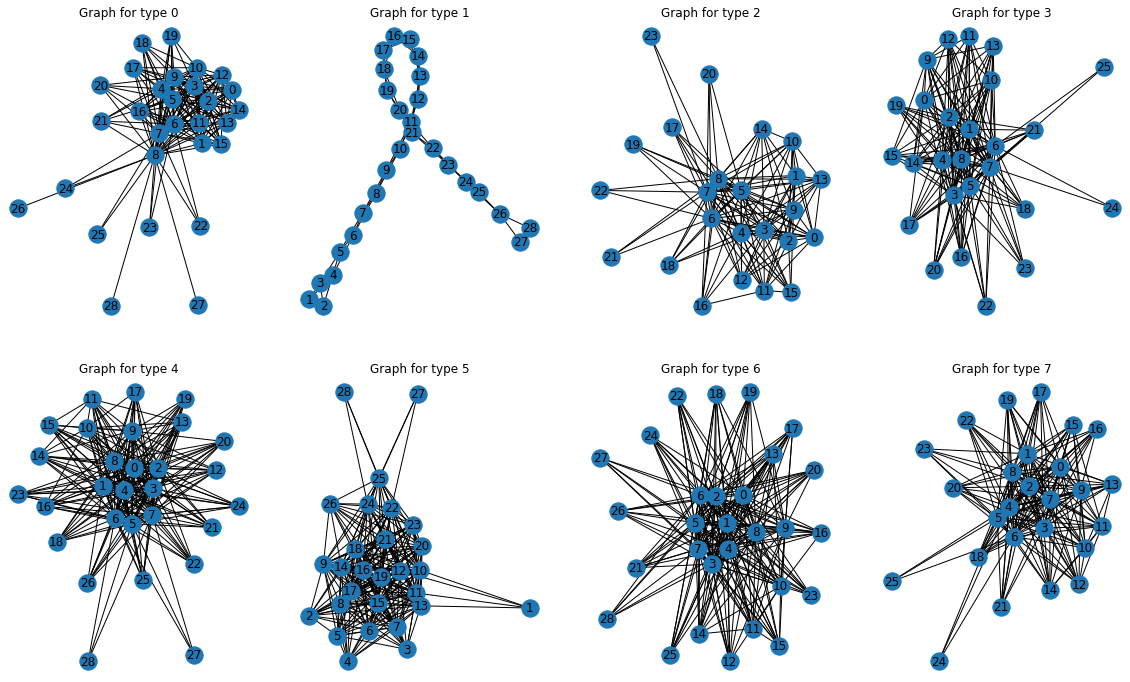

In [82]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (20, 12))
for idx, val in enumerate(train["type"].unique()):
    train_type = train.loc[train["type"] == val]
    G = nx.from_pandas_edgelist(
        df=train_type, 
        source="atom_index_0", 
        target="atom_index_1", 
        edge_attr=["scalar_coupling_constant"]
    )
    
    plt.subplot(2, 4, idx+1);
    nx.draw(G, with_labels=True);
    plt.title(f"Graph for type {idx}")

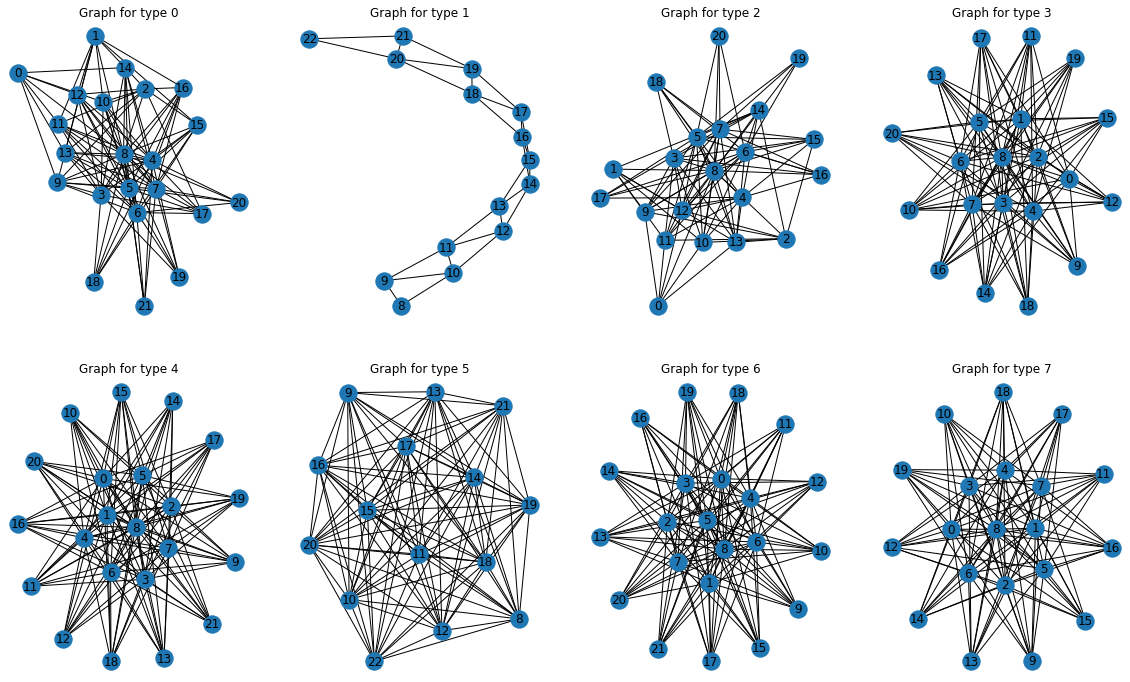

In [83]:
fig, ax = plt.subplots(figsize = (20, 12))
for idx, val in enumerate(train["type"].unique()):
    train_type = train.loc[train["type"] == val]
    
    rare_atoms_0 = list(
        train_type["atom_index_0"]
        .value_counts(normalize=True)
        [train_type["atom_index_0"]
         .value_counts(normalize=True) < 0.01]
        .index
    )
    
    rare_atoms_1 = list(
        train_type["atom_index_1"]
        .value_counts(normalize=True)
        [train_type["atom_index_1"]
        .value_counts(normalize=True) < 0.01]
        .index
    )
    
    rare_atoms = list(set(rare_atoms_0 + rare_atoms_1))
    
    train_type = train_type.loc[
        (train_type["atom_index_0"].isin(rare_atoms_0) == False) &
        (train_type["atom_index_1"].isin(rare_atoms_1) == False)
    ]
    
    G = nx.from_pandas_edgelist(
        df=train_type, 
        source="atom_index_0", 
        target="atom_index_1", 
        edge_attr=["scalar_coupling_constant"]
    )
    
    plt.subplot(2, 4, idx+1);
    nx.draw(G, with_labels=True);
    plt.title(f"Graph for type {idx}")

In [84]:
join_atom0_to_train = pd.merge(
    train, 
    structure, 
    left_on=["molecule_name", "atom_index_0"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_atom0_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,1,H,0.00215,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,1,H,0.00215,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,1,H,0.00215,-0.006031,0.001976


In [85]:
join_atom0_to_train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
atom_index                  0
atom                        0
x                           0
y                           0
z                           0
dtype: int64

In [86]:
join_atom0_to_train = join_atom0_to_train.drop("atom_index", axis=1)
join_atom0_to_train = join_atom0_to_train.rename(
    columns={
        "atom": "atom_0",
        "x": "x_0",
        "y": "y_0",
        "z": "z_0",
    }
)

join_atom0_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976


In [87]:
join_allatom_to_train = pd.merge(
    join_atom0_to_train, 
    structure, 
    left_on=["molecule_name", "atom_index_1"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_allatom_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_index,atom,x,y,z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,0,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,2,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,3,H,-0.540815,1.447527,-0.876644


In [88]:
join_allatom_to_train.isnull().sum()

id                          0
molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
atom_0                      0
x_0                         0
y_0                         0
z_0                         0
atom_index                  0
atom                        0
x                           0
y                           0
z                           0
dtype: int64

In [89]:
join_allatom_to_train = join_allatom_to_train.drop("atom_index", axis=1)
join_allatom_to_train = join_allatom_to_train.rename(
    columns={
        "atom": "atom_1",
        "x": "x_1",
        "y": "y_1",
        "z": "z_1",
    }
)

join_allatom_to_train.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644


In [90]:
train_all = join_allatom_to_train

In [91]:
join_atom0_to_test = pd.merge(
    test, 
    structure, 
    left_on=["molecule_name", "atom_index_0"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_atom0_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_index,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,2,H,-1.661639,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,2,H,-1.661639,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,2,H,-1.661639,0.0,1.0


In [92]:
join_atom0_to_test = join_atom0_to_test.drop("atom_index", axis=1)
join_atom0_to_test = join_atom0_to_test.rename(
    columns={
        "atom": "atom_0",
        "x": "x_0",
        "y": "y_0",
        "z": "z_0",
    }
)

join_atom0_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0


In [93]:
join_allatom_to_test = pd.merge(
    join_atom0_to_test, 
    structure, 
    left_on=["molecule_name", "atom_index_1"],
    right_on=["molecule_name", "atom_index"],
    how="left",
)

join_allatom_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_index,atom,x,y,z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,0,C,0.599539,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,1,C,-0.599539,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,3,H,1.661639,0.0,1.0


In [94]:
join_allatom_to_test = join_allatom_to_test.drop("atom_index", axis=1)
join_allatom_to_test = join_allatom_to_test.rename(
    columns={
        "atom": "atom_1",
        "x": "x_1",
        "y": "y_1",
        "z": "z_1",
    }
)

join_allatom_to_test.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0


In [95]:
test_all = join_allatom_to_test

In [96]:
train_p_0 = train_all[["x_0", "y_0", "z_0"]].values
train_p_1 = train_all[["x_1", "y_1", "z_1"]].values
test_p_0 = test_all[["x_0", "y_0", "z_0"]].values
test_p_1 = test_all[["x_1", "y_1", "z_1"]].values

In [97]:
import numpy as np

train_all["dist"] = np.linalg.norm(train_p_0 - train_p_1, axis=1)
train_all["dist_x"] = np.square(train_all["x_0"] - train_all["x_1"])
train_all["dist_y"] = np.square(train_all["y_0"] - train_all["y_1"])
train_all["dist_z"] = np.square(train_all["z_0"] - train_all["z_1"])

test_all["dist"] = np.linalg.norm(test_p_0 - test_p_1, axis=1)
test_all["dist_x"] = np.square(test_all["x_0"] - test_all["x_1"])
test_all["dist_y"] = np.square(test_all["y_0"] - test_all["y_1"])
test_all["dist_z"] = np.square(test_all["z_0"] - test_all["z_1"])

In [98]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973


In [99]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,0.599539,0.0,1.0,2.261178,5.112926,0.0,0.0
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,-0.599539,0.0,1.0,1.062099,1.128054,0.0,0.0
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,1.661639,0.0,1.0,3.323277,11.044171,0.0,0.0


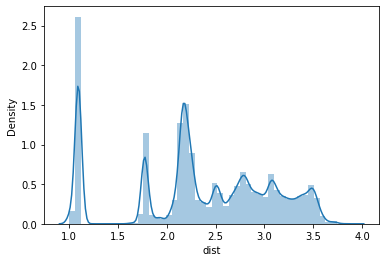

In [100]:
sns.distplot(train_all["dist"]);

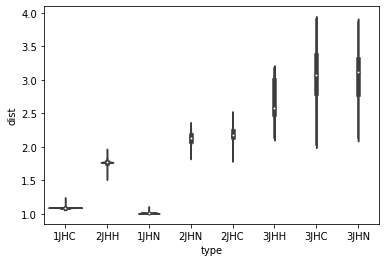

In [101]:
sns.violinplot(data=train_all, x="type", y="dist");

In [102]:
train_all["type"]

0          1JHC
1          2JHH
2          2JHH
3          2JHH
4          1JHC
           ... 
4659071    2JHC
4659072    3JHC
4659073    3JHC
4659074    2JHC
4659075    1JHC
Name: type, Length: 4659076, dtype: object

In [103]:
train_all["type"].apply(lambda x: x[0])

0          1
1          2
2          2
3          2
4          1
          ..
4659071    2
4659072    3
4659073    3
4659074    2
4659075    1
Name: type, Length: 4659076, dtype: object

In [104]:
train_all["type"].apply(lambda x: x[1:])

0          JHC
1          JHH
2          JHH
3          JHH
4          JHC
          ... 
4659071    JHC
4659072    JHC
4659073    JHC
4659074    JHC
4659075    JHC
Name: type, Length: 4659076, dtype: object

In [105]:
train_all["type_0"] = train_all["type"].apply(lambda x: x[0])
train_all["type_1"] = train_all["type"].apply(lambda x: x[1:])

test_all["type_0"] = test_all["type"].apply(lambda x: x[0])
test_all["type_1"] = test_all["type"].apply(lambda x: x[1:])

In [106]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_x,dist_y,dist_z,type_0,type_1
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1,JHC
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2,JHH
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2,JHH


In [107]:
train_all["dist_to_type_mean"] = train_all["dist"] / train_all.groupby("type")["dist"].transform("mean")
train_all["dist_to_type_0_mean"] = train_all["dist"] / train_all.groupby("type_0")["dist"].transform("mean")
train_all["dist_to_type_1_mean"] = train_all["dist"] / train_all.groupby("type_1")["dist"].transform("mean")

test_all["dist_to_type_mean"] = test_all["dist"] / test_all.groupby("type")["dist"].transform("mean")
test_all["dist_to_type_0_mean"] = test_all["dist"] / test_all.groupby("type_0")["dist"].transform("mean")
test_all["dist_to_type_1_mean"] = test_all["dist"] / test_all.groupby("type_1")["dist"].transform("mean")

In [108]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,z_1,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,...,0.008001,1.091953,0.000220,1.192105,0.000036,1,JHC,0.999134,1.003399,0.462988
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,...,0.000277,1.783120,1.019253,2.160261,0.000003,2,JHH,1.004647,0.852964,0.762007
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,...,-0.876644,1.783147,0.294812,2.112831,0.771973,2,JHH,1.004663,0.852977,0.762019


In [109]:
train_all["molecule_type_dist_mean"] = train_all.groupby(["molecule_name", "type"])["dist"].transform("mean")
test_all["molecule_type_dist_mean"] = test_all.groupby(["molecule_name", "type"])["dist"].transform("mean")

In [110]:
train_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,H,0.00215,-0.006031,0.001976,...,1.091953,0.000220,1.192105,0.000036,1,JHC,0.999134,1.003399,0.462988,1.091950
1,1,dsgdb9nsd_000001,1,2,2JHH,-11.2570,H,0.00215,-0.006031,0.001976,...,1.783120,1.019253,2.160261,0.000003,2,JHH,1.004647,0.852964,0.762007,1.783146
2,2,dsgdb9nsd_000001,1,3,2JHH,-11.2548,H,0.00215,-0.006031,0.001976,...,1.783147,0.294812,2.112831,0.771973,2,JHH,1.004663,0.852977,0.762019,1.783146


In [111]:
train_all.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_0', 'x_0', 'y_0', 'z_0', 'atom_1',
       'x_1', 'y_1', 'z_1', 'dist', 'dist_x', 'dist_y', 'dist_z', 'type_0',
       'type_1', 'dist_to_type_mean', 'dist_to_type_0_mean',
       'dist_to_type_1_mean', 'molecule_type_dist_mean'],
      dtype='object')

In [112]:
test_all.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,atom_0,x_0,y_0,z_0,atom_1,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,4659076,dsgdb9nsd_000004,2,0,2JHC,H,-1.661639,0.0,1.0,C,...,2.261178,5.112926,0.0,0.0,2,JHC,1.032513,1.081806,0.958989,2.261178
1,4659077,dsgdb9nsd_000004,2,1,1JHC,H,-1.661639,0.0,1.0,C,...,1.062099,1.128054,0.0,0.0,1,JHC,0.971802,0.976024,0.450447,1.062099
2,4659078,dsgdb9nsd_000004,2,3,3JHH,H,-1.661639,0.0,1.0,H,...,3.323277,11.044171,0.0,0.0,3,JHH,1.230092,1.115834,1.420208,3.323277


In [113]:
from sklearn import preprocessing

columns = ["atom_0", "atom_1", "type", "type_0", "type_1"]

for col in columns:
    lbl_enc = preprocessing.LabelEncoder()
    lbl_enc.fit(list(train_all[col].values) + list(test_all[col].values))
    
    train_all[col] = lbl_enc.transform(list(train_all[col].values))
    test_all[col] = lbl_enc.transform(list(test_all[col].values))

train_all.head()

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean
0,0,dsgdb9nsd_000001,1,0,0,84.8076,0,0.002150,-0.006031,0.001976,...,1.091953,0.000220,1.192105,0.000036,0,0,0.999134,1.003399,0.462988,1.091950
1,1,dsgdb9nsd_000001,1,2,3,-11.2570,0,0.002150,-0.006031,0.001976,...,1.783120,1.019253,2.160261,0.000003,1,1,1.004647,0.852964,0.762007,1.783146
2,2,dsgdb9nsd_000001,1,3,3,-11.2548,0,0.002150,-0.006031,0.001976,...,1.783147,0.294812,2.112831,0.771973,1,1,1.004663,0.852977,0.762019,1.783146
3,3,dsgdb9nsd_000001,1,4,3,-11.2543,0,0.002150,-0.006031,0.001976,...,1.783157,0.276638,2.085032,0.817978,1,1,1.004668,0.852982,0.762023,1.783146
4,4,dsgdb9nsd_000001,2,0,0,84.8074,0,1.011731,1.463751,0.000277,...,1.091952,1.049455,0.142844,0.000060,0,0,0.999132,1.003397,0.462987,1.091950


In [114]:
from sklearn import model_selection

df = train_all
df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)

kf = model_selection.KFold(n_splits=5)
for fold, (trn_idx, val_idx) in enumerate(kf.split(X=df)):
    df.loc[val_idx, "kfold"] = fold

df.to_csv("../input/train_folds.csv", index=False)


In [115]:
train_folds = pd.read_csv("../input/train_folds.csv")
train_folds.head(3)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_0,x_0,y_0,z_0,...,dist_x,dist_y,dist_z,type_0,type_1,dist_to_type_mean,dist_to_type_0_mean,dist_to_type_1_mean,molecule_type_dist_mean,kfold
0,1721469,dsgdb9nsd_056027,16,8,5,6.51795,0,-2.465676,-3.662485,2.247861,...,0.468332,0.384591,10.480869,2,0,1.093286,1.130147,1.427425,3.140089,0
1,4586962,dsgdb9nsd_128842,9,0,0,92.35070,0,0.301758,2.036393,0.570021,...,0.429017,0.516584,0.267004,0,0,1.007579,1.011880,0.466901,1.096161,0
2,3400894,dsgdb9nsd_098054,12,3,5,-0.59066,0,-1.435106,-2.851332,-2.488098,...,2.533132,4.145449,1.537134,2,0,0.930827,0.962210,1.215313,2.853890,0


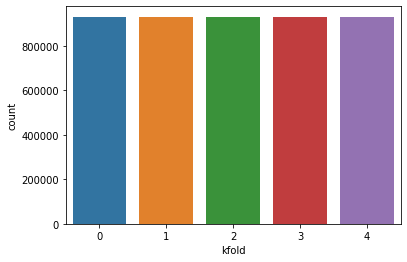

In [116]:
sns.countplot(train_folds["kfold"]);

In [117]:
import lightgbm as lgb
from sklearn import metrics
import pickle

def run(fold):
    df = train_folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(["id", "molecule_name", "scalar_coupling_constant", "kfold"], axis=1) 
    ytrain = df_train["scalar_coupling_constant"]
    xvalid = df_valid.drop(["id", "molecule_name", "scalar_coupling_constant", "kfold"], axis=1) 
    yvalid = df_valid["scalar_coupling_constant"]
    
    clf = lgb.LGBMRegressor()
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict(xvalid)
    accuracy = metrics.mean_absolute_error(yvalid, preds)
    print(f"Fold {fold}, MAE={accuracy:.3f}")
    
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = xtrain.columns
    fold_importance["importance"] = clf.feature_importances_
    fold_importance.to_csv(f"../input/importance_{fold}.csv", index=False)
    
    with open(f"../model_preds/model_{fold}.pickle", mode="wb") as fp:
        pickle.dump(clf, fp)
    

In [118]:
for j in range(5):
    run(j)

Fold 0, MAE=2.344
Fold 1, MAE=2.354
Fold 2, MAE=2.353
Fold 3, MAE=2.354
Fold 4, MAE=2.349


In [119]:
importance_fold0 = pd.read_csv("../input/importance_0.csv")

importance_fold1 = pd.read_csv("../input/importance_1.csv")
importance_fold1 = importance_fold1.drop("feature", axis=1)

importance_fold2 = pd.read_csv("../input/importance_2.csv")
importance_fold2 = importance_fold2.drop("feature", axis=1)

importance_fold3 = pd.read_csv("../input/importance_3.csv")
importance_fold3 = importance_fold3.drop("feature", axis=1)

importance_fold4 = pd.read_csv("../input/importance_4.csv")
importance_fold4 = importance_fold4.drop("feature", axis=1)

In [120]:
importance_all = pd.concat(
    [
        importance_fold0, 
        importance_fold1, 
        importance_fold2, 
        importance_fold3, 
        importance_fold4
    ], axis=1
)

cols = [f for f in importance_all.columns if f not in ["feature"]]
importance_all["mean"] = importance_all[cols].mean(axis=1)

importance_all.head()

,feature,importance,importance,importance,importance,importance,mean
0,atom_index_0,264,260,268,255,268,263.0
1,atom_index_1,268,265,282,266,278,271.8
2,type,145,139,139,134,160,143.4
3,atom_0,0,0,0,0,0,0.0
4,x_0,78,76,68,81,83,77.2


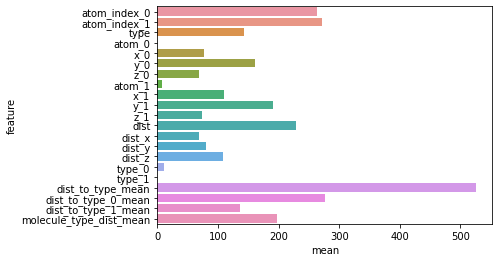

In [121]:
sns.barplot(data=importance_all, x="mean", y="feature");

In [122]:
def predict(fold):
    df = test_all
    model_path = f"../model_preds/model_{fold}.pickle"
    
    xtest = df.drop(["id", "molecule_name"], axis=1)
    
    with open(model_path, mode="rb") as fp:
        clf = pickle.load(fp)
    
    preds = clf.predict(xtest)
    
    sub = pd.DataFrame({"id":df["id"].values})
    sub["scalar_coupling_constant"] = preds
    sub.to_csv(f"submisson_{fold}.csv", index=False)
    

In [123]:
p1 = predict(0)
p2 = predict(1)
p3 = predict(2)
p4 = predict(3)
p5 = predict(4)

In [128]:
importance_fold0 = pd.read_csv("../input/importance_0.csv")

importance_fold1 = pd.read_csv("../input/importance_1.csv")
importance_fold1 = importance_fold1.drop("feature", axis=1)

importance_fold2 = pd.read_csv("../input/importance_2.csv")
importance_fold2 = importance_fold2.drop("feature", axis=1)

importance_fold3 = pd.read_csv("../input/importance_3.csv")
importance_fold3 = importance_fold3.drop("feature", axis=1)

importance_fold4 = pd.read_csv("../input/importance_4.csv")
importance_fold4 = importance_fold4.drop("feature", axis=1)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'